In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

filepath = '/Users/adronallen/Downloads/Global Superstore Data.xlsx'

orders_df = pd.read_excel(filepath, sheet_name='Orders')
returns_df = pd.read_excel(filepath, sheet_name='Returns')
people_df = pd.read_excel(filepath,sheet_name='People')

print("DataFrames loaded successfully:")
print(f"Orders table shape: {orders_df.shape}")
print(f"Returns table shape: {returns_df.shape}")
print(f"People table shape: {people_df.shape}")

DataFrames loaded successfully:
Orders table shape: (51290, 24)
Returns table shape: (2033, 3)
People table shape: (24, 2)


In [2]:
# Merging Orders + Returns
returns_flag_df = returns_df[['Order ID']].copy()
returns_flag_df['Is_Returned'] = 1

orders_with_returns = pd.merge(
    orders_df,
    returns_flag_df,
    on='Order ID',
    how='left'
)

orders_with_returns['Is_Returned'] = orders_with_returns['Is_Returned'].fillna(0).astype(int)
print(f"Shape after first merge: {orders_with_returns.shape}")

Shape after first merge: (51593, 25)


In [3]:
# Merging Orders/Returns + People
combined_superstore_df = pd.merge(
    orders_with_returns,
    people_df,
    on='Region',
    how='left'
)

print(f"Shape after second merge: {combined_superstore_df.shape}")
print("\nFinal Merged DataFrame (Head):")
print(combined_superstore_df[['Order ID', 'Region', 'Person', 'Is_Returned', 'Sales', 'Profit']].head())

Shape after second merge: (51593, 26)

Final Merged DataFrame (Head):
                 Order ID         Region                Person  Is_Returned  \
0  IN-2017-CA120551-42816  Southern Asia  Chandrakant Chaudhri            1   
1  ID-2015-BD116051-42248  Southern Asia  Chandrakant Chaudhri            0   
2  IN-2017-CA120551-42816  Southern Asia  Chandrakant Chaudhri            1   
3  IN-2017-CA120551-42816  Southern Asia  Chandrakant Chaudhri            1   
4  ID-2015-BD116051-42248  Southern Asia  Chandrakant Chaudhri            0   

    Sales  Profit  
0  731.82  102.42  
1  243.54  104.49  
2  346.32   13.77  
3  169.68   79.68  
4  203.88   24.36  


In [4]:
combined_superstore_df.info()
combined_superstore_df.describe()
combined_superstore_df.to_csv('combined_superstore_df.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51593 entries, 0 to 51592
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51593 non-null  int64         
 1   Order ID        51593 non-null  object        
 2   Order Date      51593 non-null  datetime64[ns]
 3   Ship Date       51593 non-null  datetime64[ns]
 4   Ship Mode       51593 non-null  object        
 5   Customer ID     51593 non-null  object        
 6   Customer Name   51593 non-null  object        
 7   Segment         51593 non-null  object        
 8   Postal Code     10078 non-null  float64       
 9   City            51593 non-null  object        
 10  State           51593 non-null  object        
 11  Country         51593 non-null  object        
 12  Region          51593 non-null  object        
 13  Market          51593 non-null  object        
 14  Product ID      51593 non-null  object        
 15  Pr

In [5]:
combined_superstore_df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Is_Returned,Person
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51588,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
51589,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
51590,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
51591,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


Question 1:
Which sales manager generates the highest total net profit for the company, after accounting for product returns?

In [6]:
# Filtering orders where the product was returned
net_sales_df = combined_superstore_df[combined_superstore_df['Is_Returned'] == 0].copy()

manager_performance = net_sales_df.groupby('Person').agg({
    'Profit':'sum',
    'Sales': 'sum',
}).reset_index()

best_manager = manager_performance.sort_values(by='Profit', ascending=False)
print('Top Performance by Net Profit')
print(best_manager)


Top Performance by Net Profit
                  Person        Profit         Sales
7          Gilbert Wolff  198283.53750  1.555893e+06
8          Hadia Bousaid  149234.95500  7.735290e+05
2   Chandrakant Chaudhri  143781.65800  7.680825e+05
16     Nicodemo Bautista  143098.99260  1.107045e+06
11           Kauri Anaru  113650.34100  1.001213e+06
3        Derrick Snyders   95303.13940  6.152618e+05
4          Dolores Davis   84821.87240  6.177567e+05
15          Miina Nylund   78156.10200  5.721255e+05
18         Oxana Lagunov   69977.25000  2.797184e+05
6            Gavino Bove   63028.21200  5.451084e+05
12      Lindiwe Afolayan   49709.43000  1.991667e+05
5        Flannery Newton   40182.32790  3.500999e+05
14     Marilène Rousseau   36110.51884  2.889145e+05
13            Lon Bonher   35485.22570  4.421455e+05
0       Andile Ihejirika   31433.94000  1.258890e+05
20       Vasco Magalhães   22301.53652  5.513607e+05
17          Nora Cuijper   21577.32000  9.563928e+04
21          Wass

In [7]:
 # Net Profit Margin
manager_performance['Profit Margin (%)'] = (manager_performance['Profit'] / manager_performance['Sales']) * 100

#most efficient
most_efficient_manager = manager_performance.sort_values(by='Profit Margin (%)', ascending=False)

print('Manager Performance')
print(most_efficient_manager)

Manager Performance
                  Person        Profit         Sales  Profit Margin (%)
18         Oxana Lagunov   69977.25000  2.797184e+05          25.017031
0       Andile Ihejirika   31433.94000  1.258890e+05          24.969562
12      Lindiwe Afolayan   49709.43000  1.991667e+05          24.958709
17          Nora Cuijper   21577.32000  9.563928e+04          22.561149
8          Hadia Bousaid  149234.95500  7.735290e+05          19.292742
2   Chandrakant Chaudhri  143781.65800  7.680825e+05          18.719558
21          Wasswa Ahmed   19915.94400  1.092606e+05          18.227924
3        Derrick Snyders   95303.13940  6.152618e+05          15.489852
4          Dolores Davis   84821.87240  6.177567e+05          13.730627
15          Miina Nylund   78156.10200  5.721255e+05          13.660657
16     Nicodemo Bautista  143098.99260  1.107045e+06          12.926214
7          Gilbert Wolff  198283.53750  1.555893e+06          12.744034
14     Marilène Rousseau   36110.51884  2.88

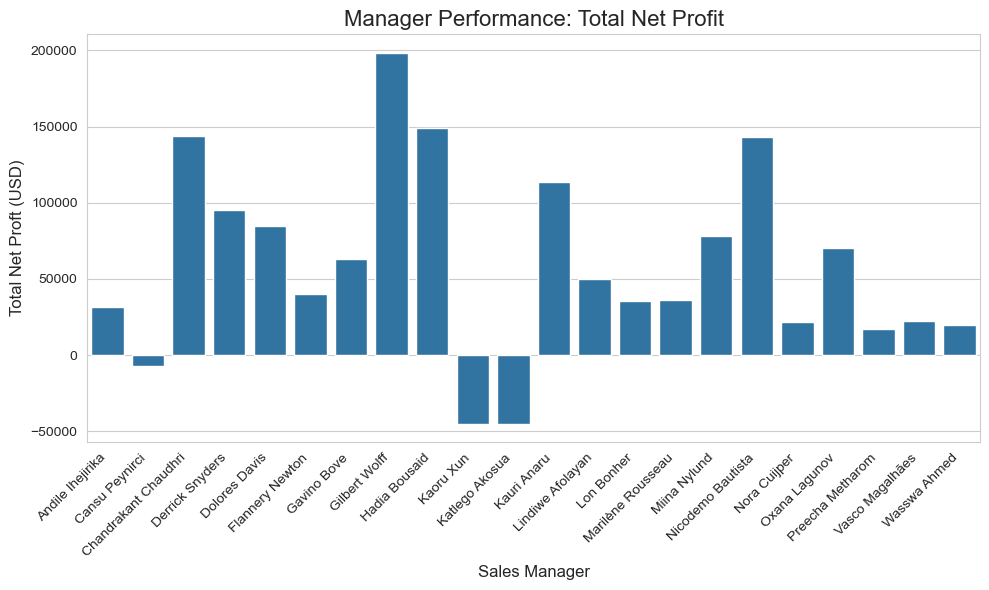

In [9]:
# Visualization 1
best_manager = manager_performance.sort_values(by='Profit', ascending=False)
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))

bar_plot = sns.barplot(
    x = 'Person',
    y = 'Profit',
    data = manager_performance
)
plt.title('Manager Performance: Total Net Profit', fontsize=16)
plt.xlabel('Sales Manager',fontsize=12)
plt.ylabel('Total Net Proft (USD)',fontsize=12)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('manager_performance.png', dpi=300)
plt.show()


Question 2: What are the top 5 sub-categories that contribute to the most to total loss profit due to returns?


In [ ]:
lost_profit_df = combined_superstore_df[
    (combined_superstore_df['Is_Returned'] == 1)&
    (combined_superstore_df['Profit'] < 0)
].copy()

#Aggregating sub-category and sum the loss of profit
lost_profit_by_subcategory = lost_profit_df.groupby('Sub-Category')['Profit'].sum().reset_index()

#Finding the biggest loss
top_5_loss_leaders = lost_profit_by_subcategory.sort_values(by='Profit', ascending=True).head(5)

print('Top 5 Sub-Categories by Total Lost Profit Due to Returns')
print(top_5_loss_leaders)



Top 5 Sub-Categories by Total Lost Profit Due to Returns
   Sub-Category      Profit
11     Machines -17829.7050
16       Tables -16018.6217
4     Bookcases -12784.5384
13       Phones -12646.5165
14      Storage -11405.5154



Saved visualization to 'top_5_loss_leaders.png'


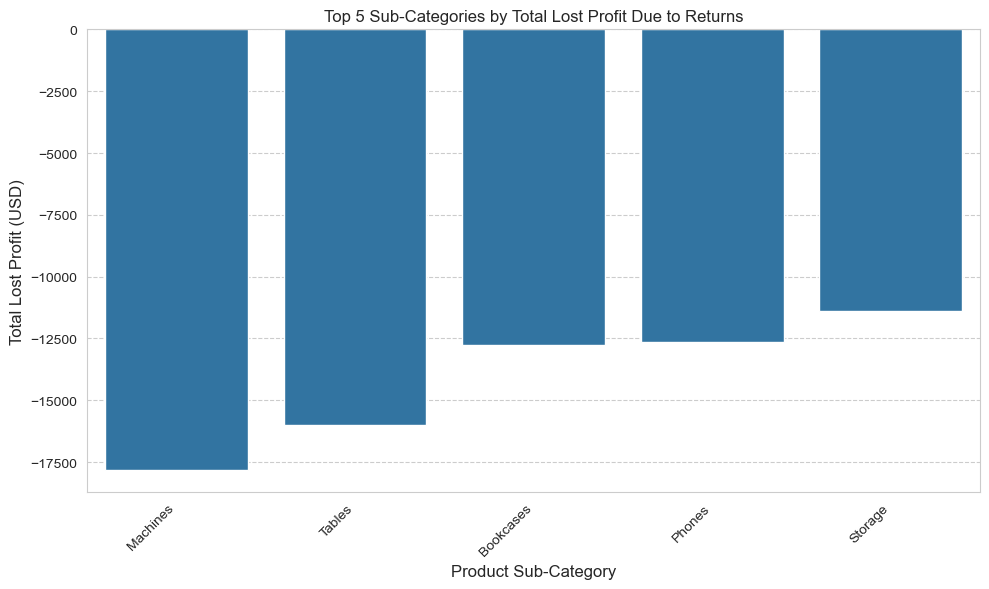

In [ ]:
# Visualization
plt.figure(figsize=(10,6))

sns.barplot(
    x='Sub-Category',
    y='Profit',
    data=top_5_loss_leaders
)

plt.title('Top 5 Sub-Categories by Total Lost Profit Due to Returns')
plt.xlabel('Product Sub-Category', fontsize=12)
plt.ylabel('Total Lost Profit (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()


plt.savefig('top_5_loss_leaders.png')
print("\nSaved visualization to 'top_5_loss_leaders.png'")

Question 3: Which ship mode is associated with the lowest profit margin, and is this low margin caused by higher discount rates or by higher return rates?

In [ ]:
shipping_analysis = combined_superstore_df.groupby('Ship Mode').agg(
    # Calculating total sales and total profit for margin calculation
    Total_Sales =('Sales', 'sum'),
    Total_Profit=('Profit','sum'),
    
    #Calculating Average Discount
    Avg_Discount=('Discount','mean'),
    
    #Calculating Return Rate
    Return_Rate=('Is_Returned', 'mean')
).reset_index()

#Calculating Profit Margin
shipping_analysis['Profit_Margin (%)'] = (shipping_analysis['Total_Profit'] / shipping_analysis['Total_Sales']) * 100

# Converting Return Rates and Discount to percentages
shipping_analysis['Avg_Discount (%)'] = shipping_analysis['Avg_Discount'] * 100
shipping_analysis['Return_Rate (%)'] = shipping_analysis['Return_Rate'] * 100

final_shipping_report =shipping_analysis[[
    'Ship Mode',
    'Profit_Margin (%)',
    'Avg_Discount (%)',
    'Return_Rate (%)',
    'Total_Sales',
    'Total_Profit'
]].sort_values(by='Profit_Margin (%)', ascending=True)

print('\n Shipping Mode Performance Analysis(Sorted by Lowest Margin)')
print(final_shipping_report)




 Shipping Mode Performance Analysis(Sorted by Lowest Margin)
        Ship Mode  Profit_Margin (%)  Avg_Discount (%)  Return_Rate (%)  \
0     First Class          11.353512         14.895873        11.825397   
2    Second Class          11.382437         14.064357        11.591545   
1        Same Day          11.517005         14.328112        12.375323   
3  Standard Class          11.691654         14.215359        11.706766   

    Total_Sales  Total_Profit  
0  1.845475e+06  209526.27650  
2  2.580676e+06  293743.75748  
1  6.721223e+05   77408.35980  
3  7.641211e+06  893384.02180  



Visualization saved to 'shipping_mode_analysis.png'


/var/folders/f3/g56pvvfj5sg9n_1h1hx1jfmr0000gn/T/ipykernel_10579/1901177417.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Metric')


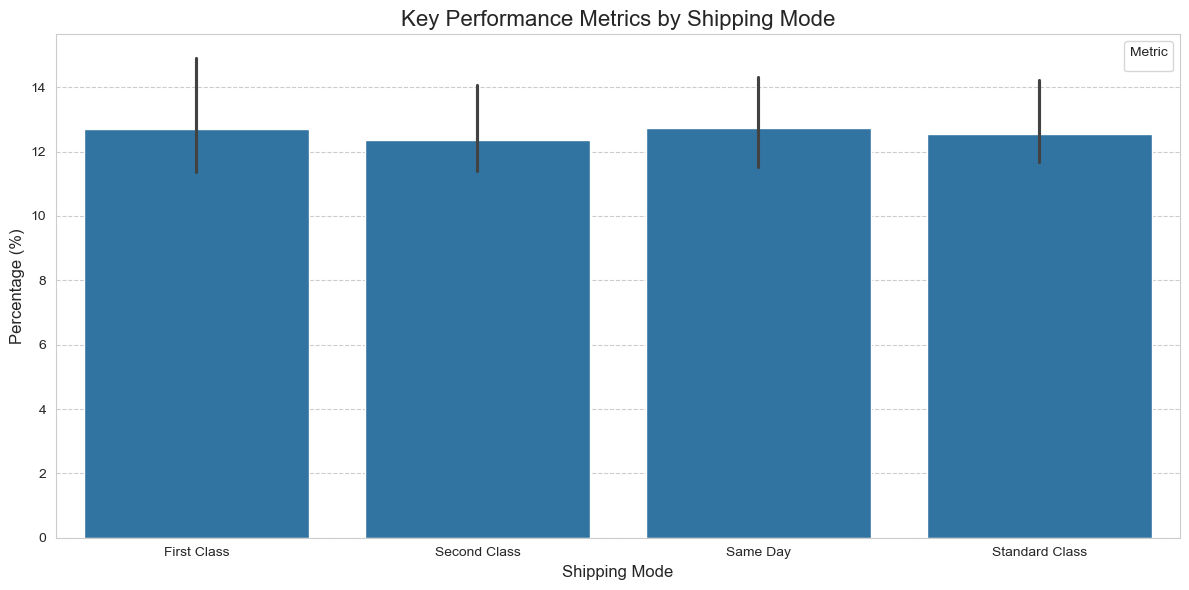

In [ ]:
#Visualization
vis_data =final_shipping_report.melt(
    id_vars='Ship Mode',
    value_vars=['Profit_Margin (%)','Avg_Discount (%)', 'Return_Rate (%)'],
    var_name='Metric',
    value_name='Percentage'
)


plt.figure(figsize=(12,6))
sns.barplot(
    x='Ship Mode',
    y= 'Percentage',
    data =vis_data
)

plt.title('Key Performance Metrics by Shipping Mode', fontsize=16)
plt.xlabel('Shipping Mode', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

plt.savefig('shipping_mode_analysis.png')
print("\nVisualization saved to 'shipping_mode_analysis.png'")

Question 4: Is there a correlation between a manager's performance in a given year and the return rate in their assigned region?

In [ ]:
#Aggregate by Region to calculate return rate
region_returns = combined_superstore_df.groupby('Region').agg(
    Return_Count=('Is_Returned', 'sum'),
    Total_Orders=('Is_Returned', 'count')
).reset_index()

# Return rate as percentage 
region_returns['Return_Rate (%)'] = (region_returns['Return_Count'] / region_returns['Total_Orders']) * 100

region_returns_rate = region_returns[['Region', 'Return_Rate (%)']]

#Merging Return Rate and Manger Name (Person)
regional_performance = combined_superstore_df.groupby('Region').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

returns_accountability = pd.merge(
    regional_performance,
    region_returns_rate,
    on='Region',
    how='left'
)

returns_accountability = pd.merge(
    returns_accountability,
    people_df,
    on='Region',
    how='left'
)

#Remove Regional Column
returns_accountability = returns_accountability.drop(columns=['Region'])

# Sort return rate to see who has the highest
returns_accountability_sorted = returns_accountability.sort_values(by='Return_Rate (%)', ascending=False)

print('\n Manager Returns Accountability Report')
print(returns_accountability_sorted)


 Manager Returns Accountability Report
     Total_Sales  Total_Profit  Return_Rate (%)                Person
6   1.279246e+05   21762.38400        14.520548          Wasswa Ahmed
22  7.398721e+05  107633.54540        13.717633       Derrick Snyders
14  8.895704e+05   17556.22600        13.659466      Preecha Metharom
10  2.345066e+05   58282.17000        13.551402      Lindiwe Afolayan
9   6.827116e+05   90801.82120        13.247566         Dolores Davis
19  1.748397e+05  -50022.64800        12.978142        Katlego Akosua
20  3.204470e+05  -54482.29200        12.433970             Kaoru Xun
5   5.126448e+05   38048.52430        12.001715            Lon Bonher
11  6.381854e+05   83026.43700        11.889693          Miina Nylund
17  6.085940e+05   70109.41800        11.689541           Gavino Bove
12  1.100429e+06  120084.57600        11.636572           Kauri Anaru
16  8.793344e+05  162661.32700        11.595824  Chandrakant Chaudhri
3   1.236214e+06  161993.83272        11.394197   


Saved visualization to 'manager_returns_correlation.png'


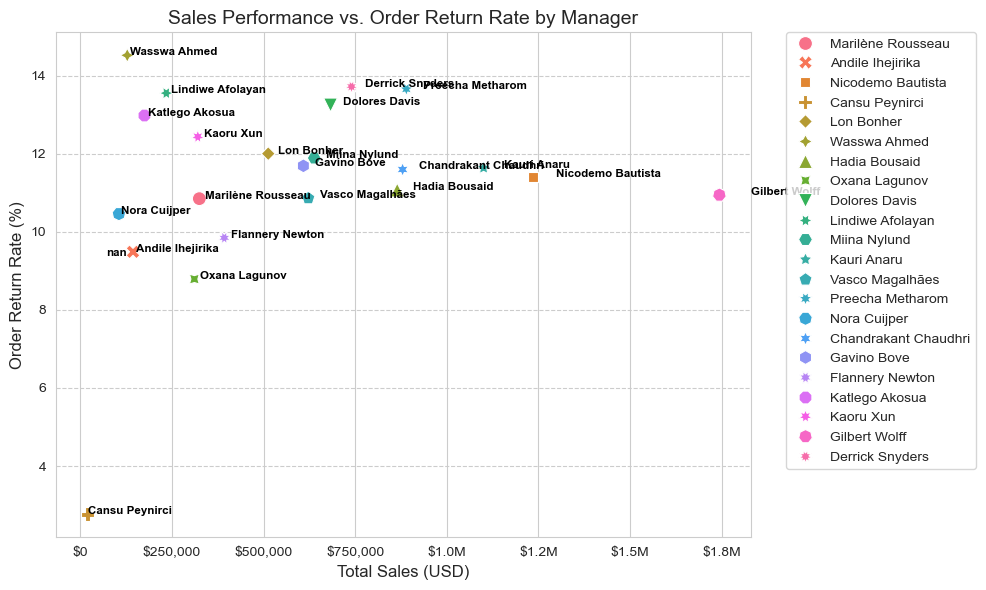

In [ ]:
#visualization
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))

sns.scatterplot(
    x='Total_Sales',
    y='Return_Rate (%)',
    data=returns_accountability,
    hue='Person',
    s=100,
    style='Person'
)

def currency_formatter(x, pos):
    if x >= 1e6:
        return '${:,.1f}M'.format(x * 1e-6)
    return '${:,.0f}'.format(x)


plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(currency_formatter))

plt.title('Sales Performance vs. Order Return Rate by Manager', fontsize=14)
plt.xlabel('Total Sales (USD)', fontsize=12)
plt.ylabel('Order Return Rate (%)', fontsize=12)

for line in range(0, returns_accountability.shape[0]):
    plt.text(
        returns_accountability['Total_Sales'][line] * 1.05,
        returns_accountability['Return_Rate (%)'][line],
        returns_accountability['Person'][line],
        horizontalalignment='left', size='small', color='black', weight='semibold'
    )

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('manager_returns_correlation.png')
print("\nSaved visualization to 'manager_returns_correlation.png'")